# Data Exploration on Digit Recognization

### Team Member
- Vinod Rao 
  -A20369838
- Ajay Ramesh 
 -A20384062

### Project Description

This is a project using a supervised machine learning method to classify handwritten digits images (Black & White) from zero through nine.
It has a training set of aggregated 42K samples for all digits 0-9 and test set of 28K samples.


### Feature Description

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixely, where y is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed y as y = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).


In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import pandas as pd
import matplotlib.cm as cm
import random

### Loading the DATASET 


In [23]:
# loading the training dataset
dataset = pd.read_csv('data/train.csv')
# create the training & test sets, skipping the header row with [1:]
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values # skipping the first label 
test = pd.read_csv("data/test.csv").values

### Data Pre-Processing

Here is the preview of the complete MNIST dataset.

In [24]:
print(dataset.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

#### Analysis on Data - Pre-processing
- No missing data in any columns. Please find below tabel where you can find count for all the columns equals to the number of records in the data set. So the data doesnt need any kind of imputation. 
- We have added some intersting charactersitcs of each column such as max and minmum value. 
   - the min value is not less than 0 for any column.
   - the mac value is not greater than 255 for any column. 
   - based on above 2 point we can concluse that data in any column is in the range 0-255. there is no error in that.
- Printing the entire table below with some extra information on each column
   

In [44]:
def printAll(X, max_rows=10):
    from IPython.display import display,HTML
    display(HTML(X.to_html(max_rows=max_rows)))   
stats = dataset.describe()
printAll(stats)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

### Pre Processing Code snippets

In [26]:
pre_prune = False
for i in stats:
    if stats[i][3] < 0 : # min is less than 0 for any features
        pre_prune = True

print("Min Case    ? , pre_prune = ",pre_prune)


pre_prune = False

for i in stats:
    if stats[i][7] > 255  : # Max  is greter than 255 for any features
        pre_prune = True

print("Max Case    ? , pre_prune = ",pre_prune)

pre_prune = False
for i in stats:
    if stats[i][0] !=  42000.00  : # Max  is greter than 255 for any features
        pre_prune = True

print("Missing data ? , pre_prune = ",pre_prune)

Min Case    ? , pre_prune =  False
Max Case    ? , pre_prune =  False
Missing data ? , pre_prune =  False


### Data Shape 

In [27]:
print("Train data Shape (X,Y) = ",train.shape)
print("Test data Shape (X,Y) = ",test.shape)

Train data Shape (X,Y) =  (42000, 784)
Test data Shape (X,Y) =  (28000, 784)


### Convert to array, specify data type, and reshape ( 28x28 Matrix)

In [28]:
target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

#### Sample converted  Matrix of random record in training data

In [29]:
(train[random.randint(0,42000)][0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5,  18, 124, 250, 255, 254,
        171,  95,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Statistics of data

In [46]:
count = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for i in range(42000):
    count[target[i]] += 1;
print("Frequencies of each class")

for category,records in count.items():
    print("Digit %d (Class) has "% category ,"%d records" % records)


Frequencies of each class
Digit 0 (Class) has  4132 records
Digit 1 (Class) has  4684 records
Digit 2 (Class) has  4177 records
Digit 3 (Class) has  4351 records
Digit 4 (Class) has  4072 records
Digit 5 (Class) has  3795 records
Digit 6 (Class) has  4137 records
Digit 7 (Class) has  4401 records
Digit 8 (Class) has  4063 records
Digit 9 (Class) has  4188 records


### Frequencies of each class

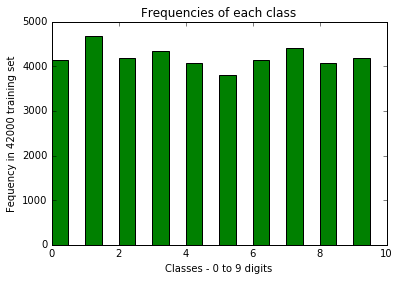

In [47]:
%matplotlib inline

x_axis = []
y_axis = []
for category,size in count.items():
        x_axis.append(category)
        y_axis.append(size)


fig, ax = plt.subplots()
rects1 = ax.bar(x_axis, y_axis, width=0.5, color='g')
plt.title('Frequencies of each class')
plt.xlabel('Classes - 0 to 9 digits')
plt.ylabel('Fequency in 42000 training set')
plt.show()

### Visualization of the target variable ( Random 10 records in Training data)

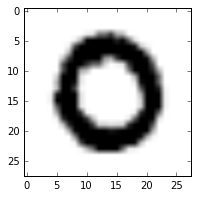

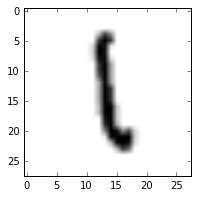

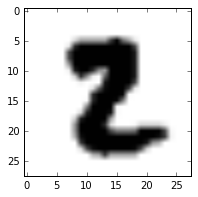

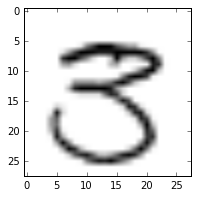

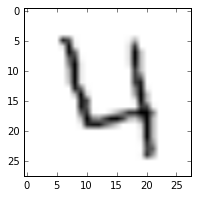

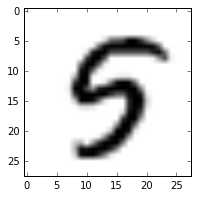

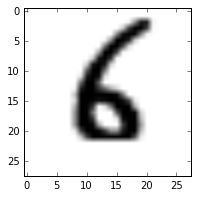

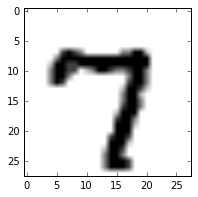

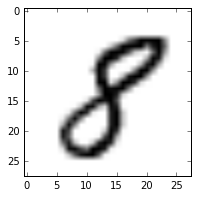

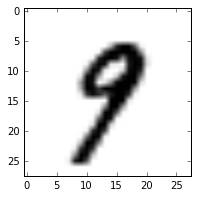

In [48]:
samples = [1,35,16,7,3,8,45,29,30,27]
for i in range(10):
    plt.figure(num=None, figsize=(3, 3), dpi=80, facecolor='w', edgecolor=None)
    plt.imshow(train[samples[i]][0], cmap=cm.binary)